# Domestic violence in Colombia from 2010 to 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import dabl
import warnings
warnings.filterwarnings('ignore')

In [3]:
columbia_crime = pd.read_csv('Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional.csv')

In [4]:
columbia_crime

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1
476967,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44300,FEMENINO,ADULTOS,1
476968,CUNDINAMARCA,TAUSA,25793000,NaN,44294,FEMENINO,ADULTOS,1


In [5]:
columbia_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476970 entries, 0 to 476969
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DEPARTAMENTO  476970 non-null  object
 1   MUNICIPIO     476970 non-null  object
 2   CODIGO DANE   476970 non-null  object
 3   ARMAS MEDIOS  476968 non-null  object
 4   FECHA HECHO   476970 non-null  object
 5   GENERO        476967 non-null  object
 6   GRUPO ETARIO  475355 non-null  object
 7   CANTIDAD      476970 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 29.1+ MB


In [6]:
columbia_crime.isnull().sum()

DEPARTAMENTO       0
MUNICIPIO          0
CODIGO DANE        0
ARMAS MEDIOS       2
FECHA HECHO        0
GENERO             3
GRUPO ETARIO    1615
CANTIDAD           0
dtype: int64

In [7]:
columbia_crime['GRUPO ETARIO'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTA', nan],
      dtype=object)

In [8]:
columbia_crime['GRUPO ETARIO'].value_counts()

ADULTOS         420237
ADOLESCENTES     28396
MENORES          26448
NO REPORTA         274
Name: GRUPO ETARIO, dtype: int64

In [9]:
columbia_crime.dropna(subset = ['GRUPO ETARIO'],inplace=True)

In [10]:
columbia_crime['GRUPO ETARIO'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTA'], dtype=object)

In [11]:
columbia_crime['GRUPO ETARIO'] = columbia_crime['GRUPO ETARIO'].replace('NO REPORTA',np.nan)

In [12]:
columbia_crime['GRUPO ETARIO'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES', nan], dtype=object)

In [13]:
columbia_crime.dropna(subset = ['GRUPO ETARIO'],inplace=True)

In [14]:
columbia_crime.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    2
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [15]:
columbia_crime['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'NO REPORTA', 'ESCOPOLAMINA', '-', nan],
      dtype=object)

In [16]:
columbia_crime['ARMAS MEDIOS'].value_counts()

CONTUNDENTES                   244787
SIN EMPLEO DE ARMAS            107209
NO REPORTADO                    71794
ARMA BLANCA / CORTOPUNZANTE     38052
NO REPORTA                       4415
ESCOPOLAMINA                     3861
ARMA DE FUEGO                    2323
CORTOPUNZANTES                   1166
CORTANTES                        1137
PUNZANTES                         334
-                                   1
Name: ARMAS MEDIOS, dtype: int64

In [17]:
columbia_crime['ARMAS MEDIOS'] = columbia_crime['ARMAS MEDIOS'].replace('-',np.nan)

In [18]:
columbia_crime.dropna(subset = ['ARMAS MEDIOS'],inplace=True)

In [19]:
columbia_crime['ARMAS MEDIOS'].value_counts()

CONTUNDENTES                   244787
SIN EMPLEO DE ARMAS            107209
NO REPORTADO                    71794
ARMA BLANCA / CORTOPUNZANTE     38052
NO REPORTA                       4415
ESCOPOLAMINA                     3861
ARMA DE FUEGO                    2323
CORTOPUNZANTES                   1166
CORTANTES                        1137
PUNZANTES                         334
Name: ARMAS MEDIOS, dtype: int64

In [20]:
columbia_crime['ARMAS MEDIOS'] = columbia_crime['ARMAS MEDIOS'].str.replace('NO REPORTA','NO REPORTADO')

In [21]:
columbia_crime['ARMAS MEDIOS'].value_counts()

CONTUNDENTES                   244787
SIN EMPLEO DE ARMAS            107209
NO REPORTADODO                  71794
ARMA BLANCA / CORTOPUNZANTE     38052
NO REPORTADO                     4415
ESCOPOLAMINA                     3861
ARMA DE FUEGO                    2323
CORTOPUNZANTES                   1166
CORTANTES                        1137
PUNZANTES                         334
Name: ARMAS MEDIOS, dtype: int64

In [22]:
columbia_crime['ARMAS MEDIOS'] = columbia_crime['ARMAS MEDIOS'].str.replace('NO REPORTADODO','NO REPORTADO')

In [23]:
columbia_crime['ARMAS MEDIOS'].value_counts()

CONTUNDENTES                   244787
SIN EMPLEO DE ARMAS            107209
NO REPORTADO                    76209
ARMA BLANCA / CORTOPUNZANTE     38052
ESCOPOLAMINA                     3861
ARMA DE FUEGO                    2323
CORTOPUNZANTES                   1166
CORTANTES                        1137
PUNZANTES                         334
Name: ARMAS MEDIOS, dtype: int64

In [24]:
columbia_crime.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [25]:
columbia_crime

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
476963,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,44335,MASCULINO,ADULTOS,1
476964,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44199,FEMENINO,ADULTOS,1
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1


In [26]:
columbia_crime.rename(columns = {'CODIGO DANE':'CODIGO_DANE'},inplace=True)

In [27]:
columbia_crime.query('CODIGO_DANE == "NO REPORTA"').CODIGO_DANE.count()

8

In [28]:
columbia_crime['CODIGO_DANE'] = columbia_crime['CODIGO_DANE'].replace('NO REPORTA',np.nan)

In [29]:
columbia_crime.dropna(subset = ['CODIGO_DANE'],inplace=True)

In [30]:
columbia_crime.query('CODIGO_DANE == "NO REPORTA"').CODIGO_DANE.count()

0

In [31]:
columbia_crime

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
476963,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,44335,MASCULINO,ADULTOS,1
476964,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44199,FEMENINO,ADULTOS,1
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1


In [32]:
columbia_crime['CODIGO_DANE'] = pd.to_numeric(columbia_crime['CODIGO_DANE'])

In [33]:
columbia_crime.count()

DEPARTAMENTO    475070
MUNICIPIO       475070
CODIGO_DANE     475070
ARMAS MEDIOS    475070
FECHA HECHO     475070
GENERO          475070
GRUPO ETARIO    475070
CANTIDAD        475070
dtype: int64

In [34]:
columbia_crime['GENERO'].unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA'], dtype=object)

In [35]:
columbia_crime['GENERO'].value_counts()

FEMENINO      365895
MASCULINO     109155
NO REPORTA        20
Name: GENERO, dtype: int64

In [36]:
columbia_crime['GENERO'] = columbia_crime['GENERO'].replace('NO REPORTA',np.nan)

In [37]:
columbia_crime.dropna(subset = ['GENERO'],inplace=True)

In [38]:
columbia_crime['GENERO'].value_counts()

FEMENINO     365895
MASCULINO    109155
Name: GENERO, dtype: int64

In [39]:
columbia_crime['GENERO'].value_counts()

FEMENINO     365895
MASCULINO    109155
Name: GENERO, dtype: int64

In [40]:
columbia_crime.isnull().sum()

DEPARTAMENTO    0
MUNICIPIO       0
CODIGO_DANE     0
ARMAS MEDIOS    0
FECHA HECHO     0
GENERO          0
GRUPO ETARIO    0
CANTIDAD        0
dtype: int64

In [41]:
columbia_crime.count()

DEPARTAMENTO    475050
MUNICIPIO       475050
CODIGO_DANE     475050
ARMAS MEDIOS    475050
FECHA HECHO     475050
GENERO          475050
GRUPO ETARIO    475050
CANTIDAD        475050
dtype: int64

In [42]:
columbia_crime['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'CORTOPUNZANTES', 'NO REPORTADO', 'PUNZANTES',
       'SIN EMPLEO DE ARMAS', 'ESCOPOLAMINA'], dtype=object)

In [43]:
columbia_crime['ARMAS MEDIOS'].value_counts()

CONTUNDENTES                   244769
SIN EMPLEO DE ARMAS            107203
NO REPORTADO                    76207
ARMA BLANCA / CORTOPUNZANTE     38051
ESCOPOLAMINA                     3861
ARMA DE FUEGO                    2323
CORTOPUNZANTES                   1165
CORTANTES                        1137
PUNZANTES                         334
Name: ARMAS MEDIOS, dtype: int64

In [44]:
columbia_crime.dropna(subset = ['ARMAS MEDIOS'],inplace=True)

In [45]:
columbia_crime.count()

DEPARTAMENTO    475050
MUNICIPIO       475050
CODIGO_DANE     475050
ARMAS MEDIOS    475050
FECHA HECHO     475050
GENERO          475050
GRUPO ETARIO    475050
CANTIDAD        475050
dtype: int64

In [46]:
columbia_crime['CANTIDAD'].unique()

array([  1,   2,   3,   4,  22,   6,   8,   5,  27,  10,   7,  11,  12,
        16,   9,  15,  14,  13,  17,  20,  19,  21,  18,  23,  24,  25,
        35,  26,  31,  29,  36,  28,  30,  32,  33,  39,  42,  34,  37,
        38,  41,  46,  56,  59,  53,  50,  40,  58,  47,  45,  85,  72,
        48,  49,  44,  54,  68,  65,  51,  71,  55,  43,  52,  61,  60,
        76,  57,  77,  78,  67,  62,  91,  69,  64,  82,  86,  66,  63,
        75,  74,  87,  79, 105,  83, 118,  90,  70,  73, 102, 100,  88,
        89, 130,  98, 109, 101,  81,  80, 106, 107,  97,  84], dtype=int64)

In [47]:
columbia_crime['CANTIDAD'].value_counts()

1      377199
2       50018
3       18095
4        8885
5        5095
        ...  
81          1
97          1
89          1
88          1
130         1
Name: CANTIDAD, Length: 102, dtype: int64

In [48]:
import datetime as dt

In [49]:
columbia_crime['FECHA HECHO'].unique()

array(['1/01/2010', '2/01/2010', '3/01/2010', ..., '44250', '44262',
       '44300'], dtype=object)

In [171]:
columbia_crime['FECHA HECHO'].value_counts()

1/01/2020     857
1/03/2020     662
8/03/2020     637
16/02/2020    589
2/02/2020     589
             ... 
44335           2
44199           1
44250           1
44262           1
44300           1
Name: FECHA HECHO, Length: 4174, dtype: int64

FECHA HECHO column has two types of data of birth 

1st --> dd/mm/yyyy

2nd --> data of birth in serial number

so we want to convert serial number data of birth to dd/mm/yyyy

In [51]:
s1=pd.to_datetime(pd.to_numeric(columbia_crime['FECHA HECHO'],errors='coerce'),errors='coerce',origin='1899-12-30',unit='D')
s2=pd.to_datetime(columbia_crime['FECHA HECHO'],errors='coerce')
columbia_crime['new']=np.where(columbia_crime['FECHA HECHO'].str.contains('/'),s2,s1)

In [52]:
columbia_crime

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,new
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01
...,...,...,...,...,...,...,...,...,...
476963,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,44335,MASCULINO,ADULTOS,1,2021-05-19
476964,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44199,FEMENINO,ADULTOS,1,2021-01-03
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1,2021-02-23
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1,2021-03-07


In [53]:
columbia_crime['new'].unique()

array(['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', ...,
       '2021-03-16T00:00:00.000000000', '2021-05-25T00:00:00.000000000',
       '2021-03-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [54]:
columbia_crime['year']=pd.to_datetime(columbia_crime['new'],format = '%d/%m/%Y').dt.year
columbia_crime['month']=pd.to_datetime(columbia_crime['new'],format = '%d/%m/%Y').dt.month
columbia_crime['day']=pd.to_datetime(columbia_crime['new'],format = '%d/%m/%Y').dt.day

In [55]:
columbia_crime

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,new,year,month,day
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01,2010,1,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01,2010,1,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
476963,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,44335,MASCULINO,ADULTOS,1,2021-05-19,2021,5,19
476964,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44199,FEMENINO,ADULTOS,1,2021-01-03,2021,1,3
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1,2021-02-23,2021,2,23
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1,2021-03-07,2021,3,7


In [56]:
columbia_crime['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [57]:
columbia_crime['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [58]:
columbia_crime['day'].unique()

array([ 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [59]:
columbia_crime['CODIGO_DANE'].value_counts()

11001000    53271
5001000     21943
76001000    18851
68001000    10405
50001000     9648
            ...  
85315000        3
68160000        3
13655000        2
27099000        1
47960000        1
Name: CODIGO_DANE, Length: 1101, dtype: int64

In [60]:
columbia_crime['MUNICIPIO'].unique()
columbia_crime['MUNICIPIO'].value_counts()

BOGOTÁ D.C. (CT)         53271
MEDELLÍN (CT)            21943
CALI (CT)                18851
BUCARAMANGA (CT)         10405
VILLAVICENCIO (CT)        9648
                         ...  
SÁCAMA                       3
SIPÍ                         3
SAN JACINTO DEL CAUCA        2
ZAPAYÁN                      1
BOJAYÁ                       1
Name: MUNICIPIO, Length: 1021, dtype: int64

In [61]:
columbia_crime['DEPARTAMENTO'].count()

475050

In [62]:
columbia_crime['ARMAS MEDIOS'].unique()
columbia_crime['ARMAS MEDIOS'].value_counts()

CONTUNDENTES                   244769
SIN EMPLEO DE ARMAS            107203
NO REPORTADO                    76207
ARMA BLANCA / CORTOPUNZANTE     38051
ESCOPOLAMINA                     3861
ARMA DE FUEGO                    2323
CORTOPUNZANTES                   1165
CORTANTES                        1137
PUNZANTES                         334
Name: ARMAS MEDIOS, dtype: int64

In [172]:
columbia_crime['GRUPO ETARIO'].unique()
columbia_crime['GRUPO ETARIO'].value_counts()

ADULTOS         420210
ADOLESCENTES     28396
MENORES          26444
Name: GRUPO ETARIO, dtype: int64

# Data visualization

In [64]:
from wordcloud import WordCloud 
import squarify

In [65]:
names = columbia_crime['DEPARTAMENTO']

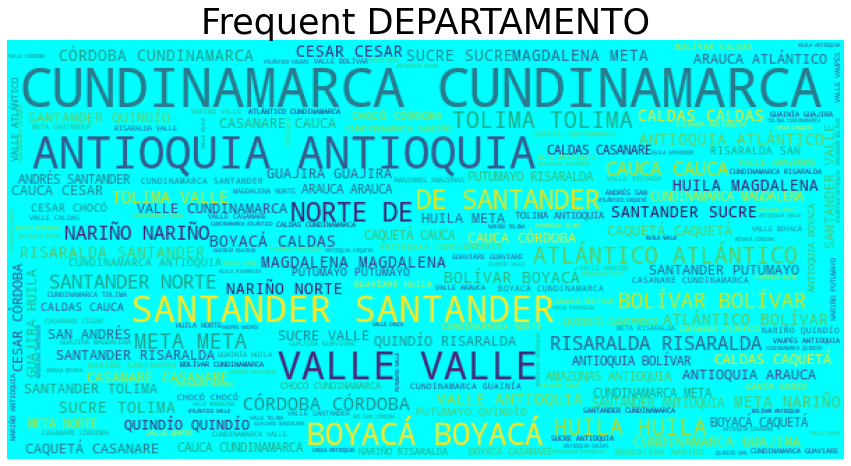

In [66]:
wordcloud = WordCloud(max_font_size=50,width=600,height=300, background_color='cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Frequent DEPARTAMENTO',fontsize=35)
plt.axis("off")
plt.show()

In [67]:
names_MUNICIPIO = columbia_crime['MUNICIPIO']

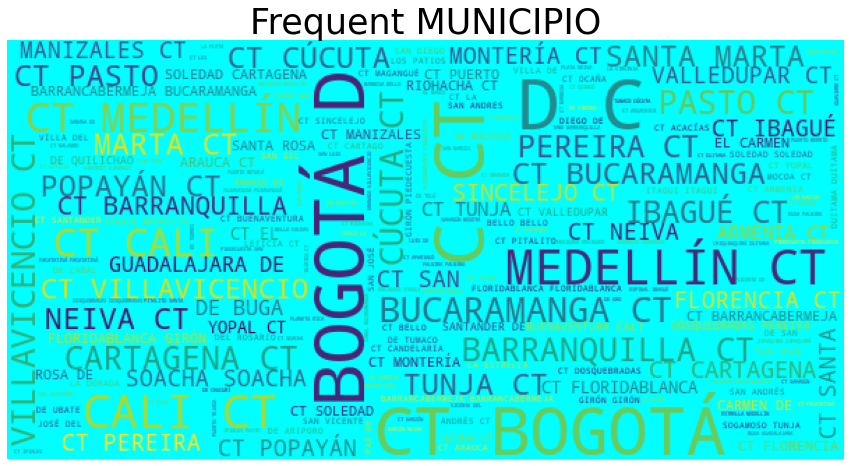

In [68]:
wordcloud = WordCloud(max_font_size=50,width=600,height=300, background_color='cyan').generate(' '.join(names_MUNICIPIO))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title('Frequent MUNICIPIO',fontsize=35)
plt.axis("off")
plt.show()

In [69]:
# counting unique values
n = len(pd.unique(columbia_crime['DEPARTAMENTO']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 32


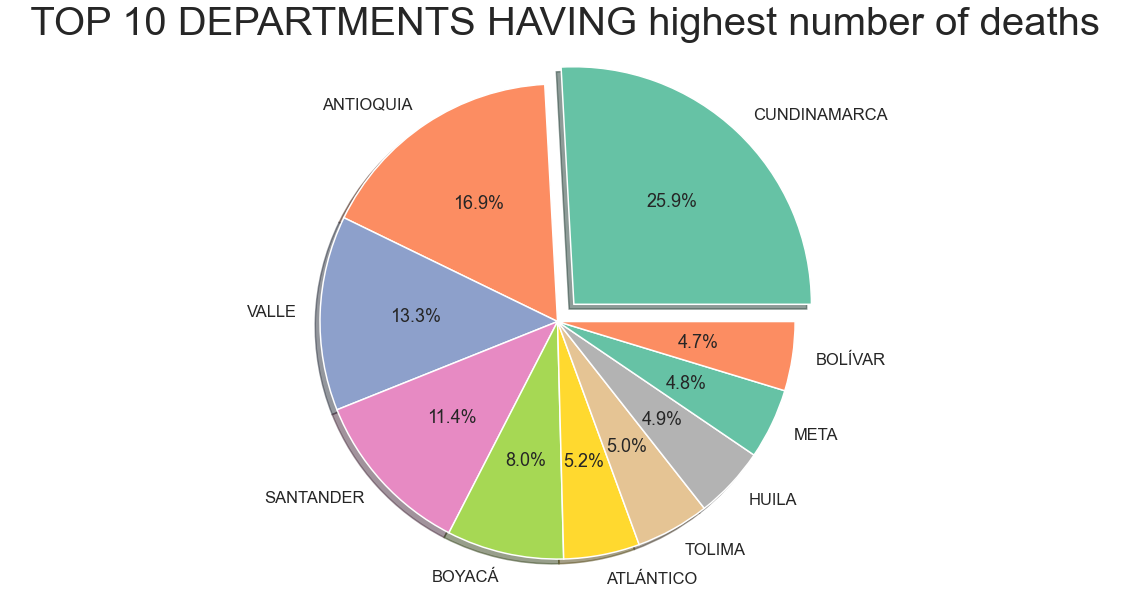

In [173]:
#d=start_ups[start_ups['Industry Vertical']!='others']['Industry Vertical'].value_counts().head(6)
d=columbia_crime['DEPARTAMENTO'].value_counts().head(10)
explode = (0.1,0,0,0,0,0,0,0,0,0)
fig,ax1=plt.subplots(figsize=(20,10))
ax1.pie(d,explode=explode,labels=d.index,autopct='%1.1f%%',pctdistance=0.6,shadow=True,labeldistance=1.1,startangle=None,radius=None, counterclock=True)
ax1.axis('equal')
plt.title(" TOP 10 DEPARTMENTS HAVING highest number of deaths ",fontsize=40)
plt.show()

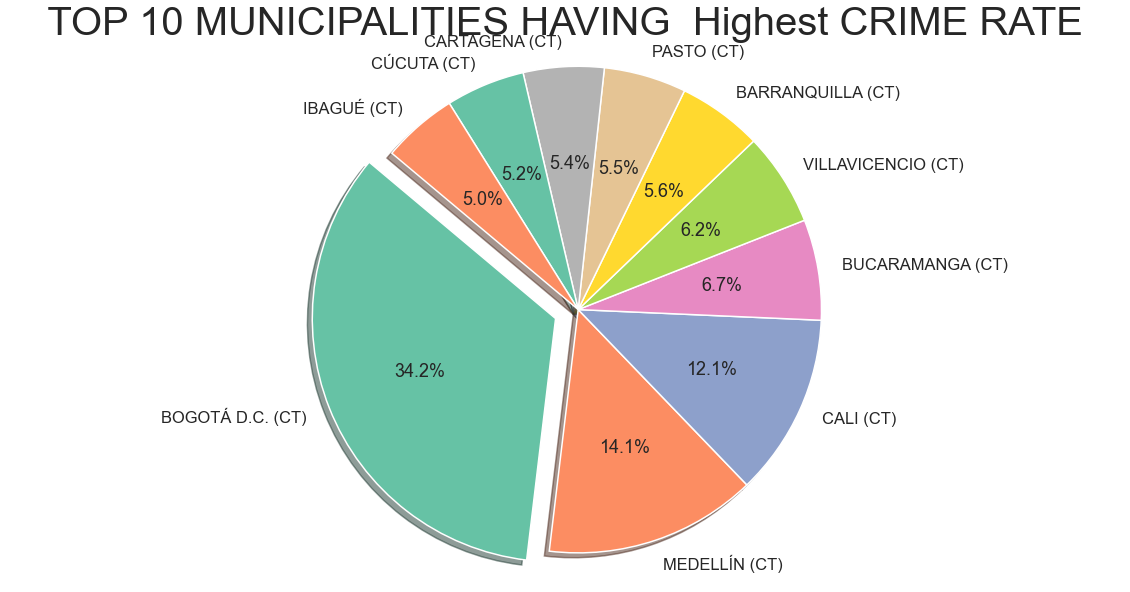

In [174]:
#pctdistance=0.6
#labeldistance=1.1
#counterclock=True
#radius=0.8
d=columbia_crime['MUNICIPIO'].value_counts().head(10)
explode = (0.1,0,0,0,0,0,0,0,0,0)
fig,ax1=plt.subplots(figsize=(20,10))
ax1.pie(d,explode=explode,labels=d.index,autopct='%1.1f%%',shadow=True,startangle=140)
ax1.axis('equal')
plt.title(" TOP 10 MUNICIPALITIES HAVING  Highest CRIME RATE ",fontsize=40)
plt.show()

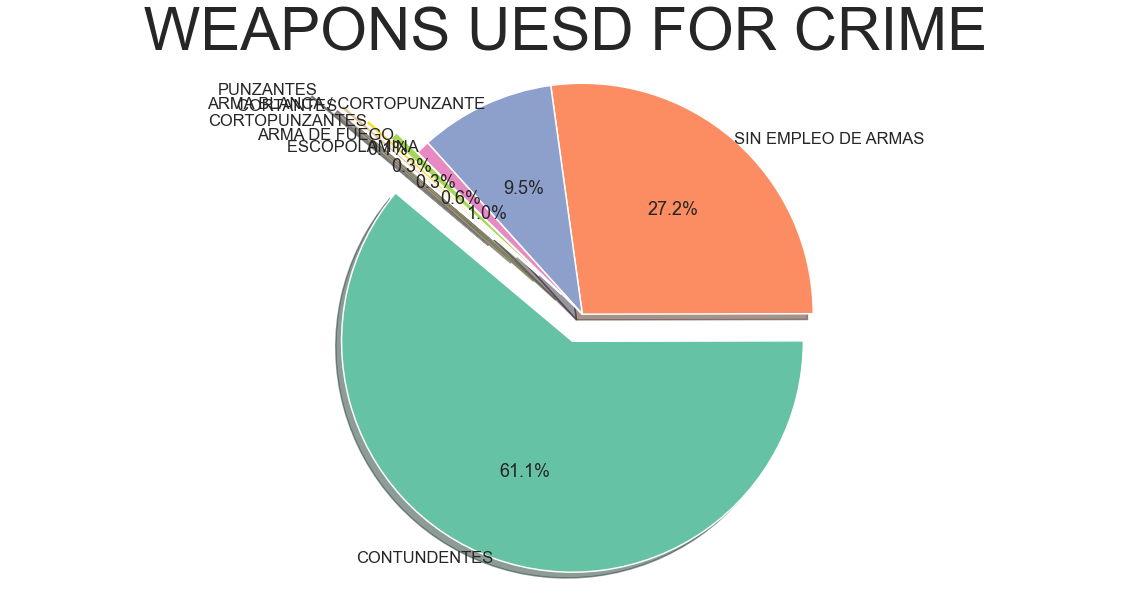

In [175]:
#d=start_ups[start_ups['Industry Vertical']!='others']['Industry Vertical'].value_counts().head(6)
#d=columbia_crime['ARMAS MEDIOS'].value_counts()
labels = ['CONTUNDENTES','SIN EMPLEO DE ARMAS','ARMA BLANCA / CORTOPUNZANTE','ESCOPOLAMINA ','ARMA DE FUEGO','CORTOPUNZANTES','CORTANTES ','PUNZANTES']
sizes = [244945,108782,38070,3863, 2323, 1167, 1138,334]
explode = (0.1,0,0,0,0.1,0.2,0.3,0.4)
fig,ax1=plt.subplots(figsize=(20,10))
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140,radius=0.8,labeldistance=1,pctdistance=0.6)
ax1.axis('equal')
plt.title(" WEAPONS UESD FOR CRIME ",fontsize=60)
plt.show()

CONTUNDENTES  WEAPONS                ->> 61.1%

SIN EMPLEO DE ARMAS                  ->> 27.2% 

ARMA BLANCA / CORTOPUNZANTE          ->> 9.5%   

ESCOPOLAMINA                         ->> 1.0%

ARMA DE FUEGO                        ->> 0.6%

CORTOPUNZANTES                       ->> 0.3%

CORTANTES                            ->> 0.3%

PUNZANTES                            ->> 0.1%

# Meaning of spanish words in english

CONTUNDENTES               :     STRONG   

SIN EMPLEO DE ARMAS         :    NO USE OF WEAPONS

ARMA BLANCA / CORTOPUNZANTE   :  WHITE WEAPON / SHORTENING

ESCOPOLAMINA                  :  SCOPOLAMINE

ARMA DE FUEGO                :   FIREARM

CORTANTES                     :  CUTTING

PUNZANTES                    :   PUNCHES


Text(0.5, 1.0, ' Highest Death rate recorded according to years ')

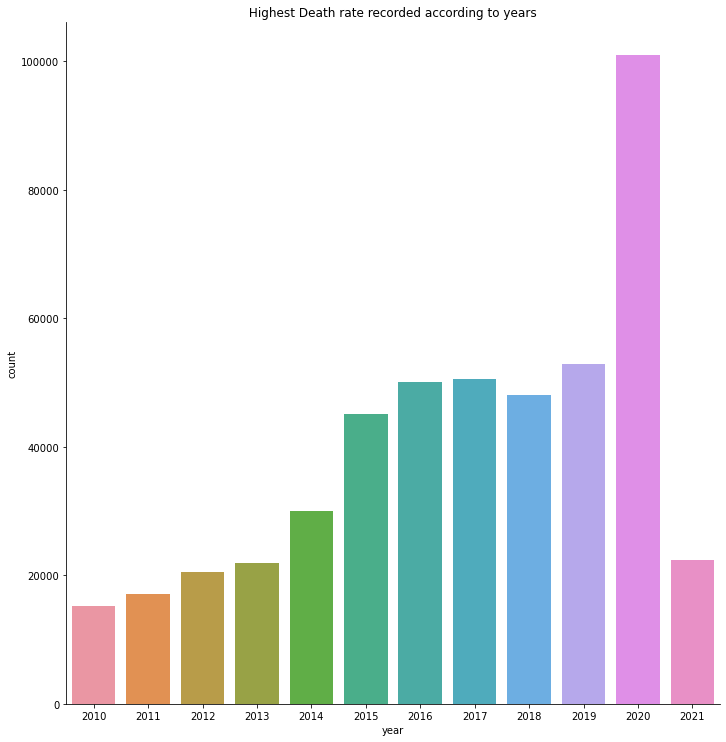

In [73]:
sns.catplot(x='year',kind='count',data=columbia_crime,height=10)
plt.title(" Highest Death rate recorded according to years ")

Text(0.5, 1.0, ' Number of Males and Females dead according to year ')

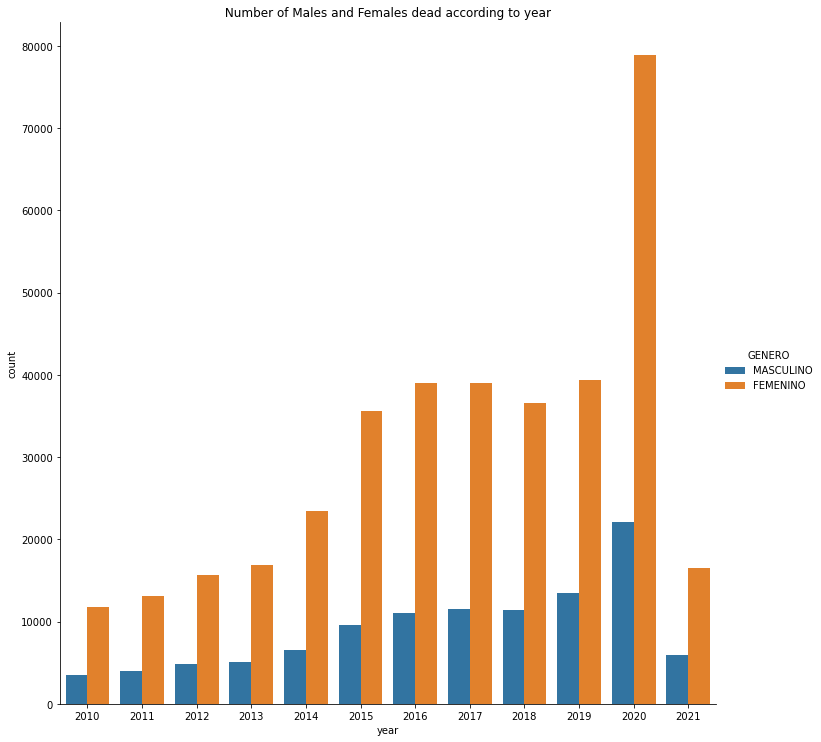

In [74]:
sns.catplot(x='year',hue='GENERO',kind='count',data=columbia_crime,height=10)
plt.title(" Number of Males and Females dead according to year ")

# MASCULINO  -->  MALE
# FEMENINO    -->  FEMALE

In [75]:
columbia_crime['GRUPO ETARIO'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES'], dtype=object)

Text(0.5, 1.0, ' Deaths in Departments according to age groups ')

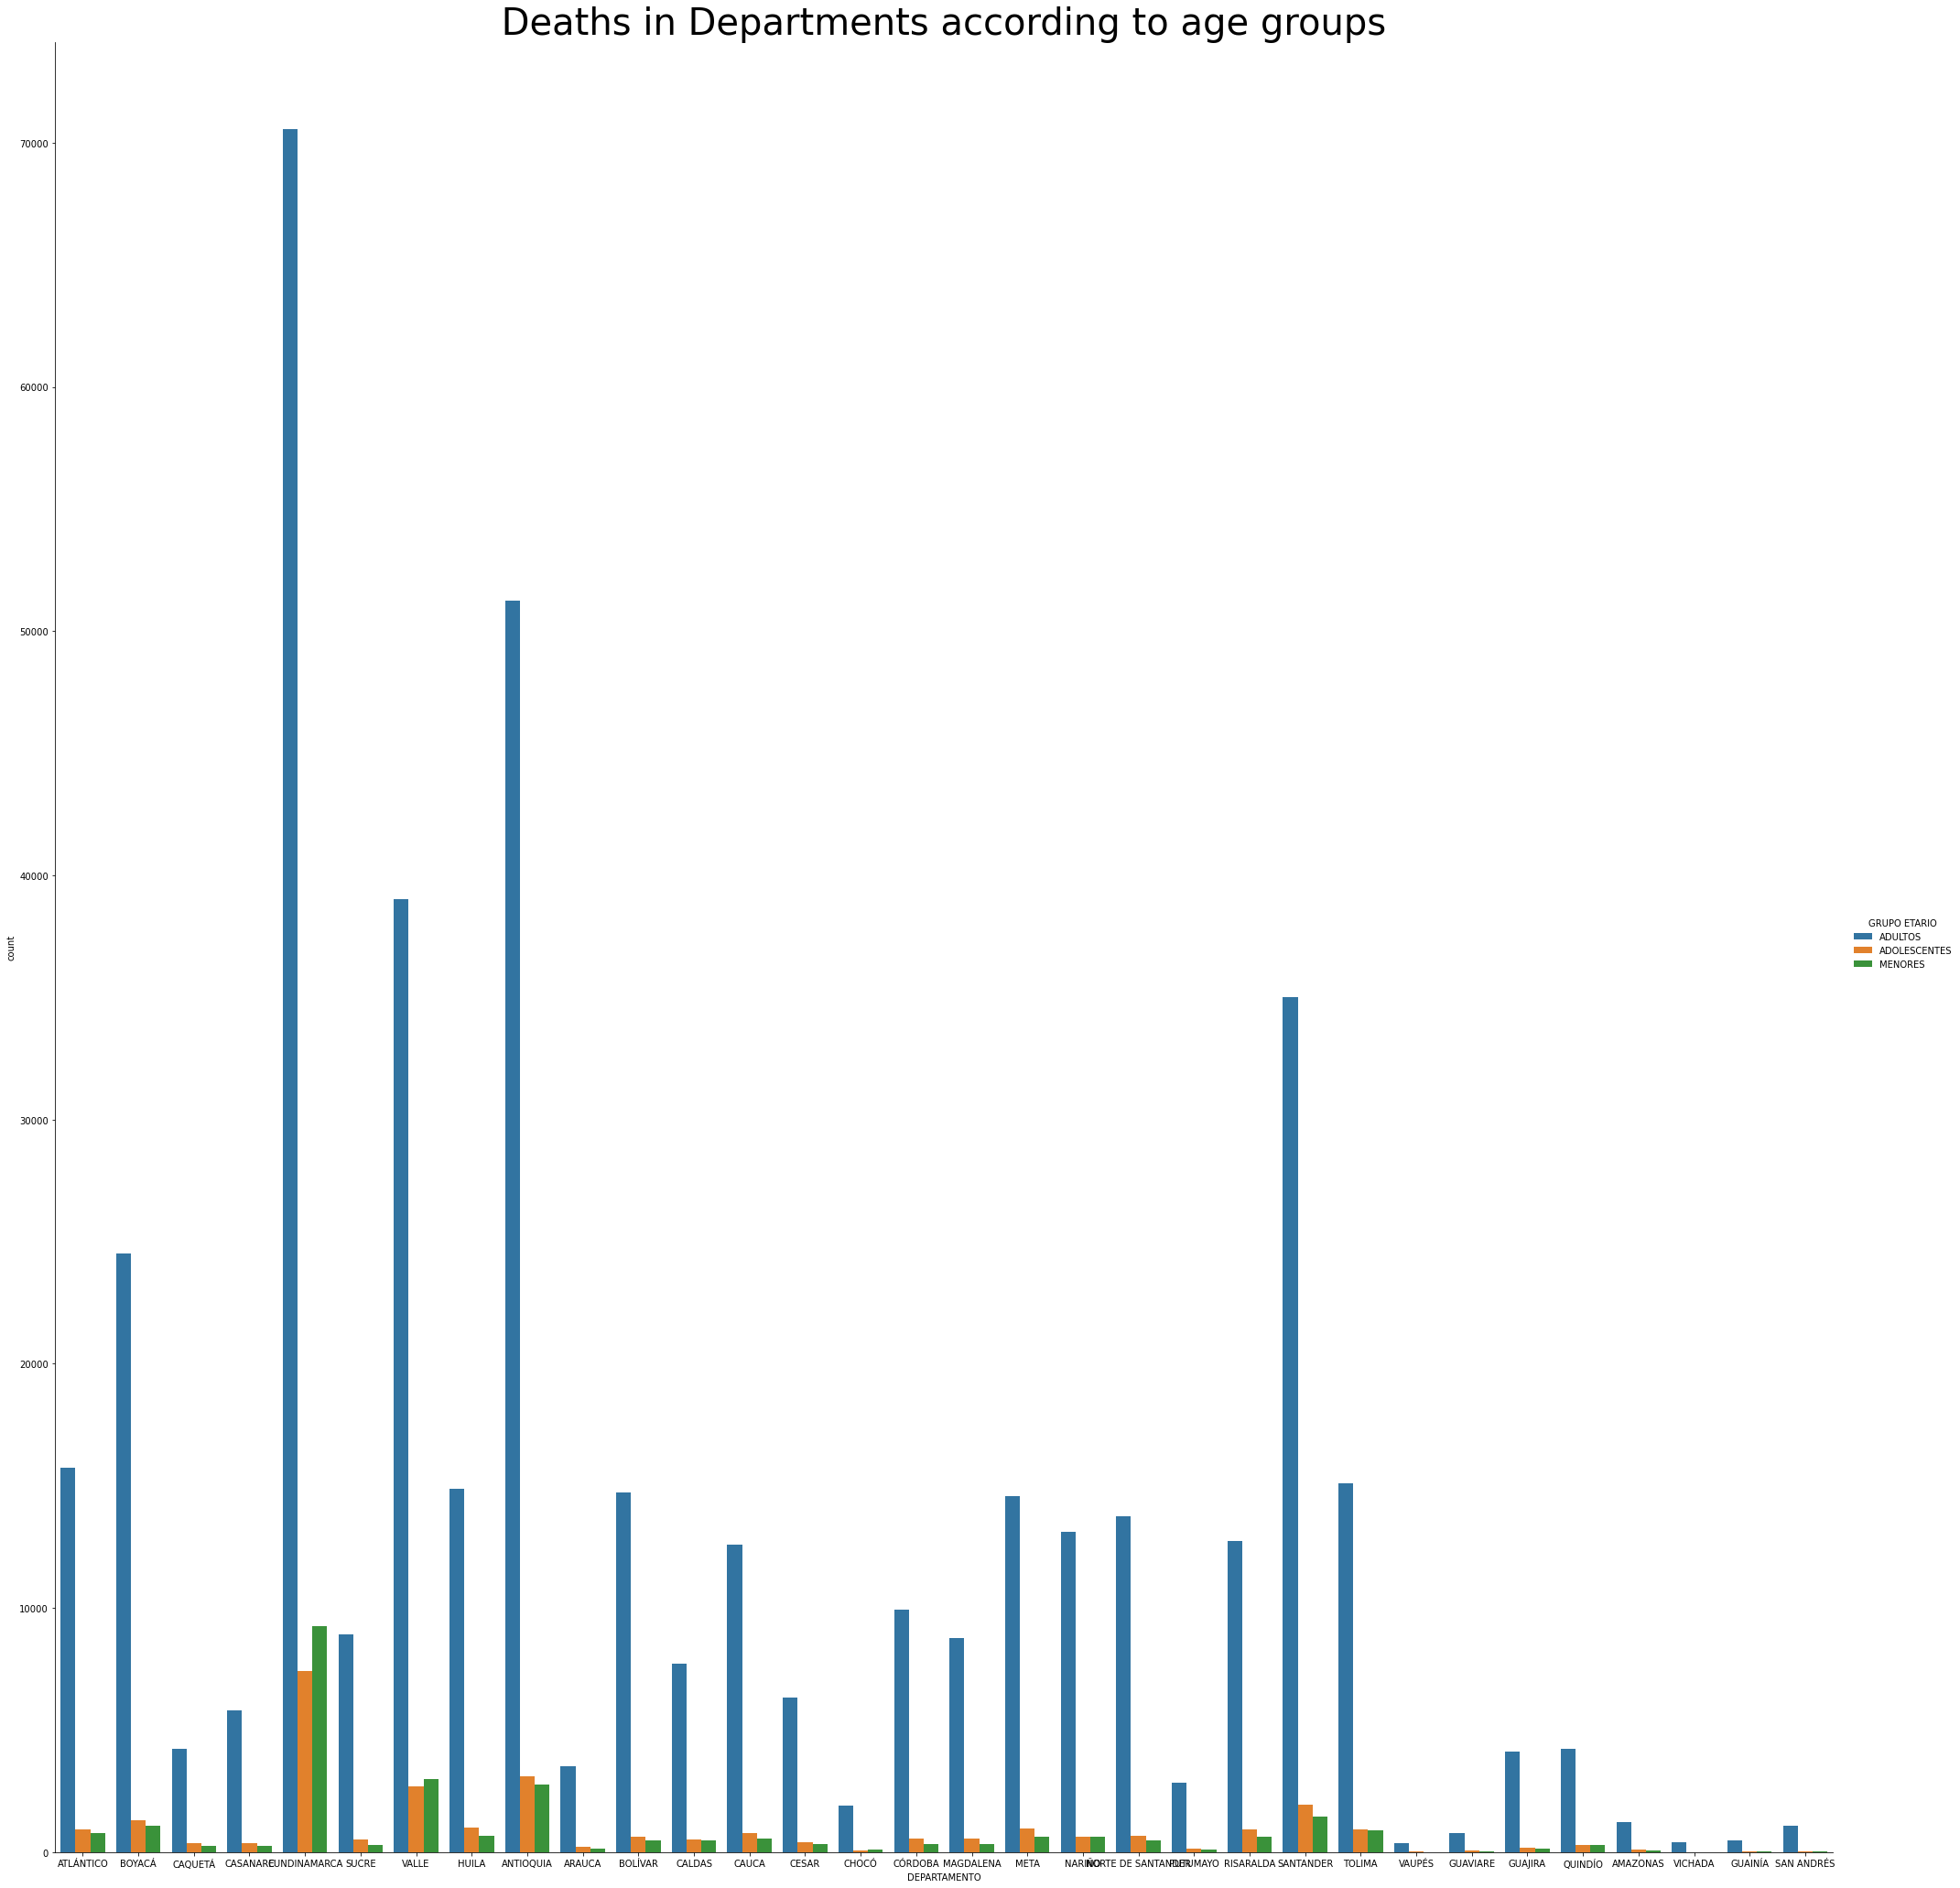

In [76]:
sns.catplot(hue='GRUPO ETARIO',x='DEPARTAMENTO',kind='count',data=columbia_crime,height=28)
plt.title(" Deaths in Departments according to age groups ",fontsize=40)

Text(0.5, 1.0, ' Age Group vs Gender ')

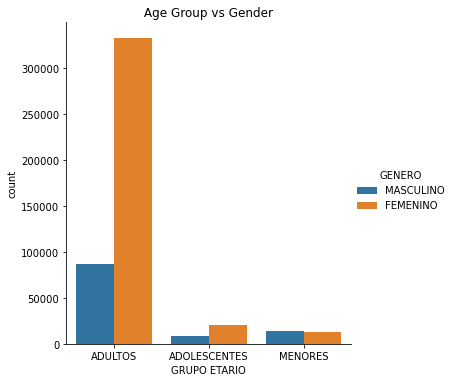

In [77]:
sns.catplot(x='GRUPO ETARIO',hue='GENERO',kind='count',data=columbia_crime)
plt.title(" Age Group vs Gender ")

Text(0.5, 1.0, ' Gender vs Age Group ')

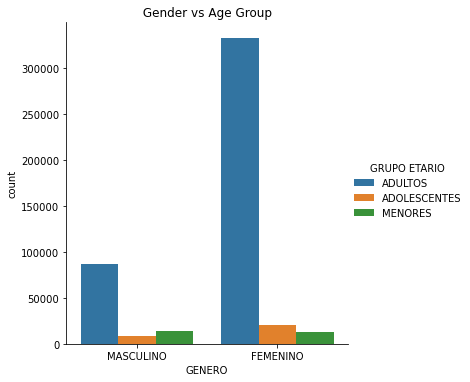

In [78]:
sns.catplot(hue='GRUPO ETARIO',x='GENERO',kind='count',data=columbia_crime)
plt.title(" Gender vs Age Group ")

Text(0.5, 1.0, ' Number of Deaths according to Gender in month wise')

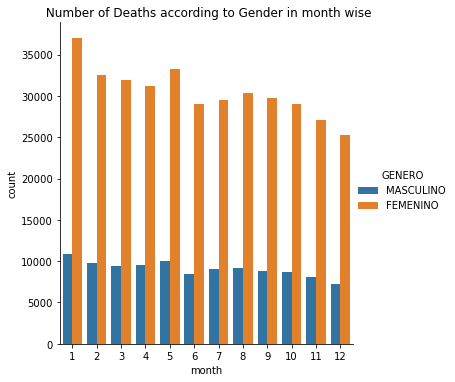

In [79]:
sns.catplot(x='month',hue='GENERO',kind='count',data=columbia_crime)
plt.title(" Number of Deaths according to Gender in month wise")

Text(0.5, 1.0, ' Number of deaths according to year and month ')

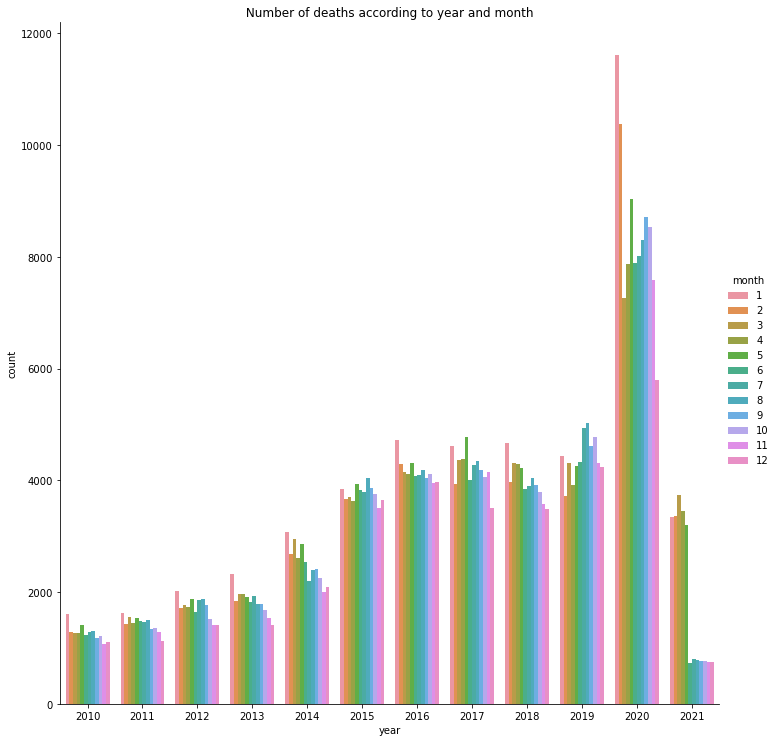

In [80]:
sns.catplot(x='year',hue='month',kind='count',data=columbia_crime,height=10)
plt.title(" Number of deaths according to year and month ")

On average every year 1st month have high deaths

Text(0.5, 1.0, 'Count of weapons used to kill people ')

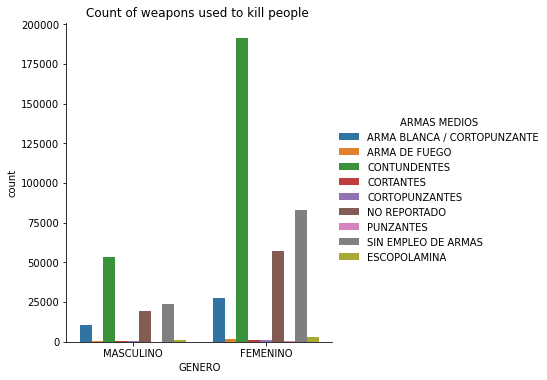

In [81]:
sns.catplot(x='GENERO',hue='ARMAS MEDIOS',kind='count',data=columbia_crime)
plt.title("Count of weapons used to kill people ")

Text(0.5, 1.0, ' COUNT OF PEOPLE KILLED BY DIFFERENT WEPONS ')

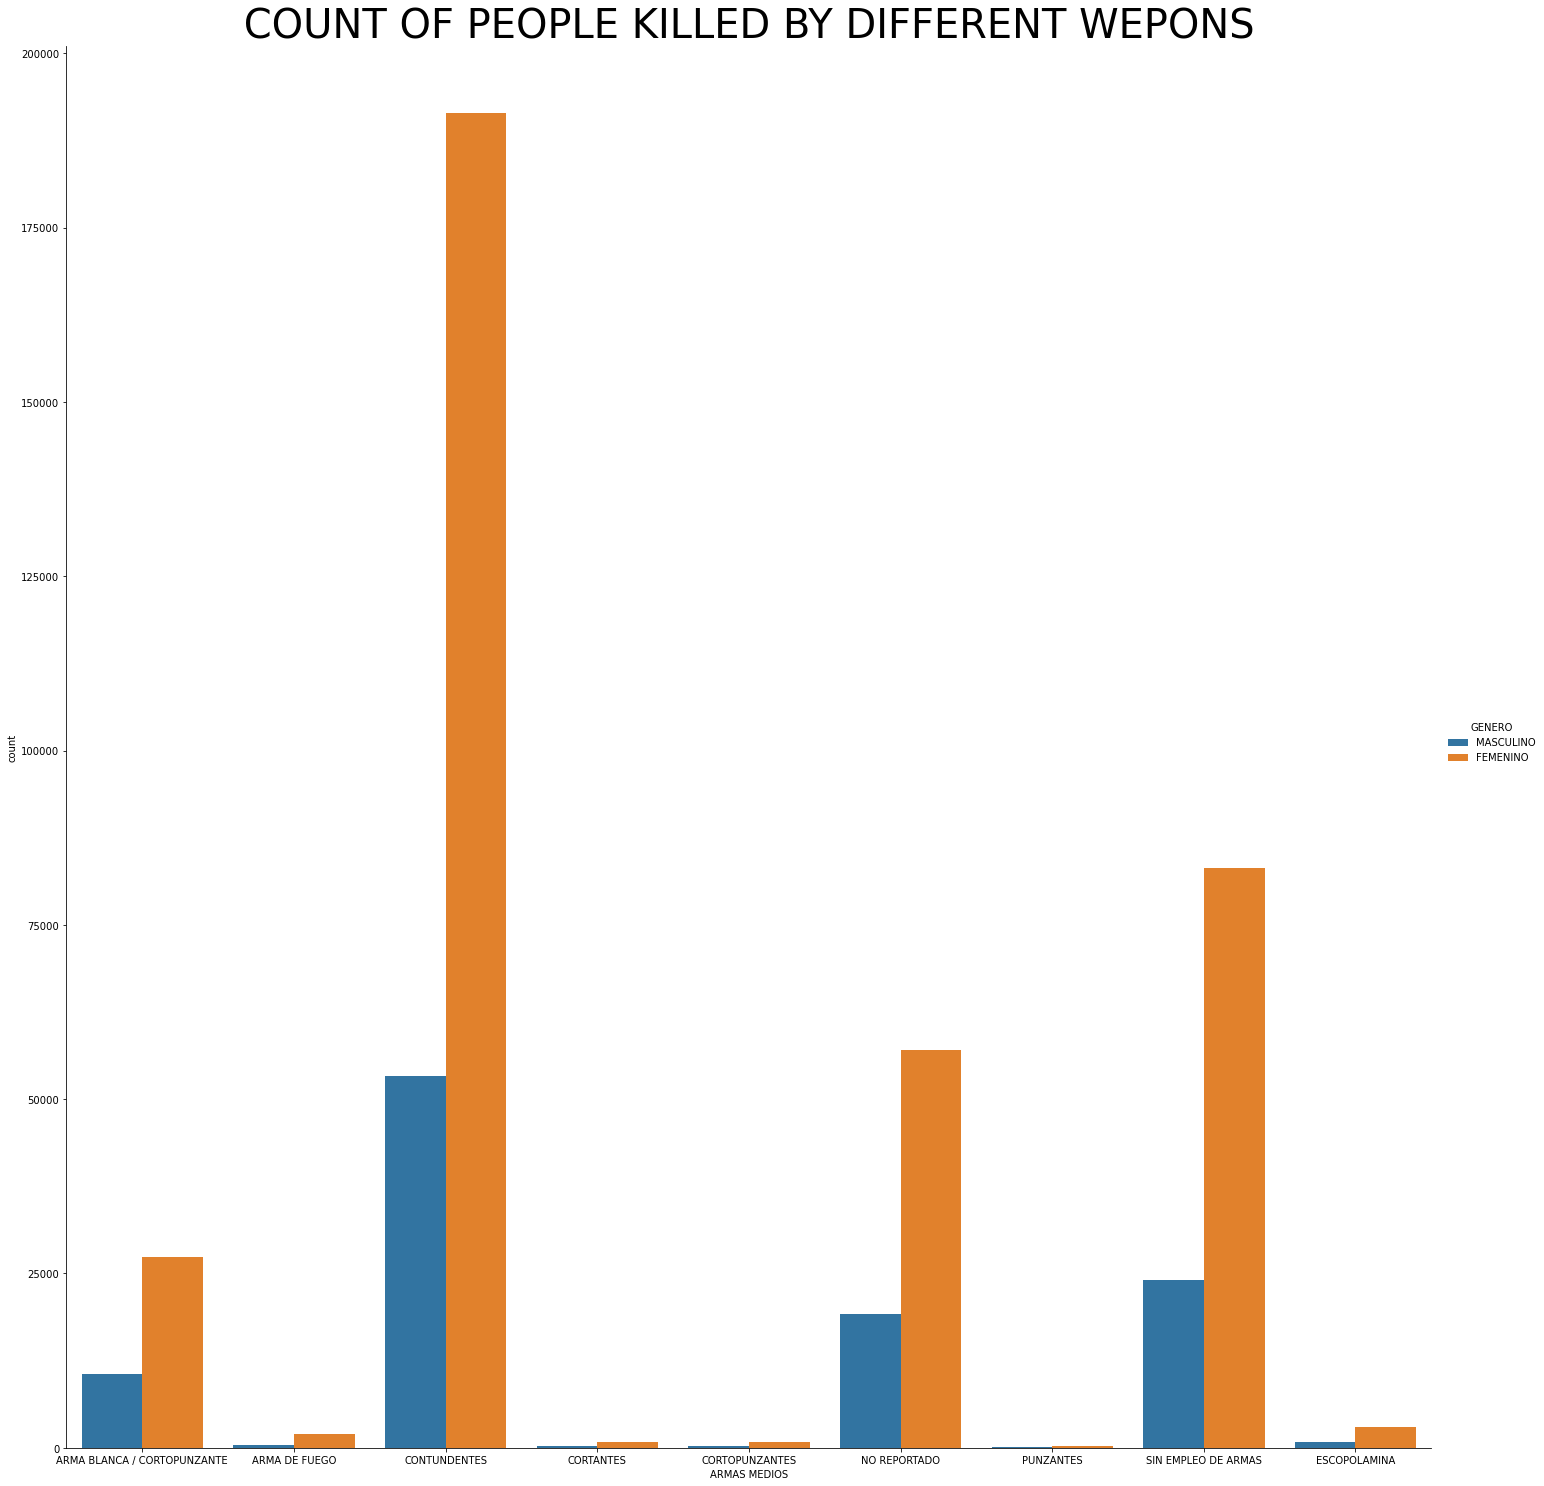

In [82]:
sns.catplot(hue='GENERO',x='ARMAS MEDIOS',kind='count',data=columbia_crime,height=20)
plt.title(" COUNT OF PEOPLE KILLED BY DIFFERENT WEPONS ",fontsize=40)

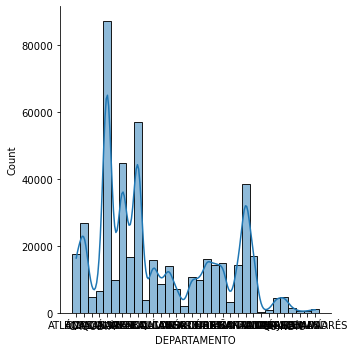

In [83]:
sns.displot(x='DEPARTAMENTO',kde=True,data=columbia_crime)

# Feature Exctaction and data encoading with label_encoading and one_hot_encoading using dummivariables

In [84]:
columbia_crime

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,new,year,month,day
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01,2010,1,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1,2010-01-01,2010,1,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1,2010-01-01,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
476963,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,44335,MASCULINO,ADULTOS,1,2021-05-19,2021,5,19
476964,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44199,FEMENINO,ADULTOS,1,2021-01-03,2021,1,3
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44250,FEMENINO,MENORES,1,2021-02-23,2021,2,23
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,44262,FEMENINO,ADULTOS,1,2021-03-07,2021,3,7


In [85]:
new_data = pd.DataFrame(columbia_crime,columns = ['DEPARTAMENTO','MUNICIPIO','CODIGO_DANE','ARMAS MEDIOS','GENERO','GRUPO ETARIO','CANTIDAD','year','month','day'])

In [86]:
new_data

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,year,month,day
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010,1,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010,1,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,MASCULINO,ADULTOS,1,2010,1,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010,1,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,FEMENINO,ADULTOS,1,2010,1,1
...,...,...,...,...,...,...,...,...,...,...
476963,VICHADA,PUERTO CARREÑO (CT),99001000,SIN EMPLEO DE ARMAS,MASCULINO,ADULTOS,1,2021,5,19
476964,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,FEMENINO,ADULTOS,1,2021,1,3
476965,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,FEMENINO,MENORES,1,2021,2,23
476966,VICHADA,SANTA ROSALÍA,99624000,SIN EMPLEO DE ARMAS,FEMENINO,ADULTOS,1,2021,3,7


Taking 10% from data using sample method and performing ml algorithms on that 10 percent data (for time saving and better results)

In [87]:
columbia_10 = new_data.sample(frac=0.1)

In [88]:
columbia_10

,DEPARTAMENTO,MUNICIPIO,CODIGO_DANE,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,year,month,day
195554,SANTANDER,GIRÓN,68307000,SIN EMPLEO DE ARMAS,FEMENINO,ADULTOS,1,2016,11,23
56866,BOLÍVAR,CARTAGENA (CT),13001000,CONTUNDENTES,FEMENINO,ADULTOS,2,2013,2,22
51399,BOLÍVAR,EL CARMEN DE BOLÍVAR,13244000,CONTUNDENTES,FEMENINO,ADULTOS,1,2012,11,24
208777,HUILA,CAMPOALEGRE,41132000,CONTUNDENTES,FEMENINO,ADOLESCENTES,1,2017,2,3
457687,BOYACÁ,MONIQUIRÁ,15469000,CONTUNDENTES,FEMENINO,ADULTOS,1,2021,8,2
...,...,...,...,...,...,...,...,...,...,...
343426,CESAR,LA GLORIA,20383000,NO REPORTADO,FEMENINO,ADULTOS,1,2019,3,11
43945,VALLE,CALI (CT),76001000,CONTUNDENTES,FEMENINO,ADULTOS,11,2012,9,7
153775,SAN ANDRÉS,SAN ANDRÉS (CT),88001000,CONTUNDENTES,FEMENINO,ADULTOS,1,2016,1,25
126594,SANTANDER,GIRÓN,68307000,SIN EMPLEO DE ARMAS,FEMENINO,ADULTOS,1,2015,6,25


# Label_Encoading

In [89]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [90]:
new_data['GENERO'] = le.fit_transform(new_data['GENERO'])

In [91]:
columbia_10.drop(['CODIGO_DANE'],axis=1,inplace=True)

In [92]:
columbia_10['GENERO'] = le.fit_transform(columbia_10['GENERO'])

In [93]:
y = pd.DataFrame(columbia_10['GENERO'])

In [94]:
columbia_10

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,year,month,day
195554,SANTANDER,GIRÓN,SIN EMPLEO DE ARMAS,0,ADULTOS,1,2016,11,23
56866,BOLÍVAR,CARTAGENA (CT),CONTUNDENTES,0,ADULTOS,2,2013,2,22
51399,BOLÍVAR,EL CARMEN DE BOLÍVAR,CONTUNDENTES,0,ADULTOS,1,2012,11,24
208777,HUILA,CAMPOALEGRE,CONTUNDENTES,0,ADOLESCENTES,1,2017,2,3
457687,BOYACÁ,MONIQUIRÁ,CONTUNDENTES,0,ADULTOS,1,2021,8,2
...,...,...,...,...,...,...,...,...,...
343426,CESAR,LA GLORIA,NO REPORTADO,0,ADULTOS,1,2019,3,11
43945,VALLE,CALI (CT),CONTUNDENTES,0,ADULTOS,11,2012,9,7
153775,SAN ANDRÉS,SAN ANDRÉS (CT),CONTUNDENTES,0,ADULTOS,1,2016,1,25
126594,SANTANDER,GIRÓN,SIN EMPLEO DE ARMAS,0,ADULTOS,1,2015,6,25


In [95]:
columbia_10 = columbia_10.drop(['GENERO'],axis=1)

In [96]:
columbia_10

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GRUPO ETARIO,CANTIDAD,year,month,day
195554,SANTANDER,GIRÓN,SIN EMPLEO DE ARMAS,ADULTOS,1,2016,11,23
56866,BOLÍVAR,CARTAGENA (CT),CONTUNDENTES,ADULTOS,2,2013,2,22
51399,BOLÍVAR,EL CARMEN DE BOLÍVAR,CONTUNDENTES,ADULTOS,1,2012,11,24
208777,HUILA,CAMPOALEGRE,CONTUNDENTES,ADOLESCENTES,1,2017,2,3
457687,BOYACÁ,MONIQUIRÁ,CONTUNDENTES,ADULTOS,1,2021,8,2
...,...,...,...,...,...,...,...,...
343426,CESAR,LA GLORIA,NO REPORTADO,ADULTOS,1,2019,3,11
43945,VALLE,CALI (CT),CONTUNDENTES,ADULTOS,11,2012,9,7
153775,SAN ANDRÉS,SAN ANDRÉS (CT),CONTUNDENTES,ADULTOS,1,2016,1,25
126594,SANTANDER,GIRÓN,SIN EMPLEO DE ARMAS,ADULTOS,1,2015,6,25


# one_hot_encoading using dummie variables method

In [97]:
DEPARTAMENTO_cat = pd.get_dummies(columbia_10['DEPARTAMENTO'] , drop_first=True)
columbia_10=pd.concat([columbia_10 ,  DEPARTAMENTO_cat] , axis=1)

In [98]:
MUNICIPIO_cat = pd.get_dummies(columbia_10['MUNICIPIO'] , drop_first=True)
columbia_10=pd.concat([columbia_10 ,  MUNICIPIO_cat] , axis=1)

In [99]:
ARMAS_MEDIOS_cat = pd.get_dummies(columbia_10['ARMAS MEDIOS'] , drop_first=True)
columbia_10=pd.concat([columbia_10 , ARMAS_MEDIOS_cat] , axis=1)

In [100]:
GRUPO_ETARIO_cat = pd.get_dummies(columbia_10['GRUPO ETARIO'] , drop_first=True)
columbia_10=pd.concat([columbia_10 , GRUPO_ETARIO_cat] , axis=1)

In [101]:
columbia_10

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GRUPO ETARIO,CANTIDAD,year,month,day,ANTIOQUIA,ARAUCA,...,ARMA DE FUEGO,CONTUNDENTES,CORTANTES,CORTOPUNZANTES,ESCOPOLAMINA,NO REPORTADO,PUNZANTES,SIN EMPLEO DE ARMAS,ADULTOS,MENORES
195554,SANTANDER,GIRÓN,SIN EMPLEO DE ARMAS,ADULTOS,1,2016,11,23,0,0,...,0,0,0,0,0,0,0,1,1,0
56866,BOLÍVAR,CARTAGENA (CT),CONTUNDENTES,ADULTOS,2,2013,2,22,0,0,...,0,1,0,0,0,0,0,0,1,0
51399,BOLÍVAR,EL CARMEN DE BOLÍVAR,CONTUNDENTES,ADULTOS,1,2012,11,24,0,0,...,0,1,0,0,0,0,0,0,1,0
208777,HUILA,CAMPOALEGRE,CONTUNDENTES,ADOLESCENTES,1,2017,2,3,0,0,...,0,1,0,0,0,0,0,0,0,0
457687,BOYACÁ,MONIQUIRÁ,CONTUNDENTES,ADULTOS,1,2021,8,2,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343426,CESAR,LA GLORIA,NO REPORTADO,ADULTOS,1,2019,3,11,0,0,...,0,0,0,0,0,1,0,0,1,0
43945,VALLE,CALI (CT),CONTUNDENTES,ADULTOS,11,2012,9,7,0,0,...,0,1,0,0,0,0,0,0,1,0
153775,SAN ANDRÉS,SAN ANDRÉS (CT),CONTUNDENTES,ADULTOS,1,2016,1,25,0,0,...,0,1,0,0,0,0,0,0,1,0
126594,SANTANDER,GIRÓN,SIN EMPLEO DE ARMAS,ADULTOS,1,2015,6,25,0,0,...,0,0,0,0,0,0,0,1,1,0


In [102]:
columbia_10.drop(['DEPARTAMENTO','MUNICIPIO','ARMAS MEDIOS','GRUPO ETARIO'],axis=1,inplace=True)

In [103]:
columbia_10

,CANTIDAD,year,month,day,ANTIOQUIA,ARAUCA,ATLÁNTICO,BOLÍVAR,BOYACÁ,CALDAS,...,ARMA DE FUEGO,CONTUNDENTES,CORTANTES,CORTOPUNZANTES,ESCOPOLAMINA,NO REPORTADO,PUNZANTES,SIN EMPLEO DE ARMAS,ADULTOS,MENORES
195554,1,2016,11,23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
56866,2,2013,2,22,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
51399,1,2012,11,24,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
208777,1,2017,2,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
457687,1,2021,8,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343426,1,2019,3,11,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
43945,11,2012,9,7,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
153775,1,2016,1,25,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
126594,1,2015,6,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


# Selecting x and y columns and converting x and y columns into array form

In [104]:
from numpy import array

In [105]:
values = array(columbia_10)

In [106]:
values

array([[   1, 2016,   11, ...,    1,    1,    0],
       [   2, 2013,    2, ...,    0,    1,    0],
       [   1, 2012,   11, ...,    0,    1,    0],
       ...,
       [   1, 2016,    1, ...,    0,    1,    0],
       [   1, 2015,    6, ...,    1,    1,    0],
       [   1, 2020,    8, ...,    0,    1,    0]], dtype=int64)

In [107]:
X = values

In [108]:
X

array([[   1, 2016,   11, ...,    1,    1,    0],
       [   2, 2013,    2, ...,    0,    1,    0],
       [   1, 2012,   11, ...,    0,    1,    0],
       ...,
       [   1, 2016,    1, ...,    0,    1,    0],
       [   1, 2015,    6, ...,    1,    1,    0],
       [   1, 2020,    8, ...,    0,    1,    0]], dtype=int64)

In [109]:
y

,GENERO
195554,0
56866,0
51399,0
208777,0
457687,0
...,...
343426,0
43945,0
153775,0
126594,0


In [110]:
y1 = array(y)

In [111]:
y1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [165]:
X.shape,y1.shape

((47505, 1018), (47505, 1))

# Traning and Testing the data and Performing different ML Algorithms on Trained and Tested data  

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X , y1 , test_size=0.3 , random_state=65 , shuffle=False)

In [115]:
from sklearn import metrics

# LogisticRegression

In [116]:
from sklearn.linear_model import LogisticRegression

#model training
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_model_score=lr_model.score(X_test, y_test)
print(f"The score is {lr_model_score}")
y_pred=lr_model.predict(X_test)
print()
print("Classfication report")
print(metrics.classification_report(y_test, y_pred))


The score is 0.7711900084198708

Classfication report
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     10937
           1       0.56      0.07      0.13      3315

    accuracy                           0.77     14252
   macro avg       0.67      0.53      0.50     14252
weighted avg       0.73      0.77      0.70     14252



# Naive Bayes Classifiers

In [117]:
from sklearn.naive_bayes import MultinomialNB

#model training
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_model_score=nb_model.score(X_test, y_test)
print(f"The score is {nb_model_score}")
y_pred=nb_model.predict(X_test)
print()
print("Classfication report")
print(metrics.classification_report(y_test, y_pred))

The score is 0.7696463654223968

Classfication report
              precision    recall  f1-score   support

           0       0.78      0.97      0.87     10937
           1       0.52      0.10      0.17      3315

    accuracy                           0.77     14252
   macro avg       0.65      0.54      0.52     14252
weighted avg       0.72      0.77      0.70     14252



# RandomForestClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
# #model training
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model_score=rf_model.score(X_test, y_test)
print(f"The score is {rf_model_score}")
y_pred=rf_model.predict(X_test)
print()
print("Classfication report")
print(metrics.classification_report(y_test, y_pred))

The score is 0.7522452989054168

Classfication report
              precision    recall  f1-score   support

           0       0.79      0.91      0.85     10937
           1       0.44      0.22      0.29      3315

    accuracy                           0.75     14252
   macro avg       0.61      0.57      0.57     14252
weighted avg       0.71      0.75      0.72     14252



# DecisionTreeClassifier

In [119]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
dt_model_score=dt_model.score(X_test, y_test)
print(f"The score is {dt_model_score}")
y_pred=rf_model.predict(X_test)
print()
print("Classfication report")
print(metrics.classification_report(y_test, y_pred))

The score is 0.699129946674151

Classfication report
              precision    recall  f1-score   support

           0       0.79      0.91      0.85     10937
           1       0.44      0.22      0.29      3315

    accuracy                           0.75     14252
   macro avg       0.61      0.57      0.57     14252
weighted avg       0.71      0.75      0.72     14252



# PassiveAggressiveClassifier

In [166]:
from sklearn.linear_model import PassiveAggressiveClassifier
##model training
pac_model = PassiveAggressiveClassifier()
pac_model.fit(X_train, y_train)
pac_model_score=pac_model.score(X_test, y_test)
print(f"The score is {pac_model_score}")
y_pred=pac_model.predict(X_test)
print()
print("Classfication report")
print(metrics.classification_report(y_test, y_pred))

The score is 0.7652878644353226

Classfication report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7271
           1       0.00      0.00      0.00      2230

    accuracy                           0.77      9501
   macro avg       0.38      0.50      0.43      9501
weighted avg       0.59      0.77      0.66      9501



# KNeighborsClassifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier

# #model training
knn_model = KNeighborsClassifier(n_neighbors= 50)
knn_model.fit(X_train, y_train)
knn_model_score=knn_model.score(X_test, y_test)
print(f"The score is {knn_model_score}")
y_pred=knn_model.predict(X_test)
print()
print("Classfication report")
print(metrics.classification_report(y_test, y_pred))

The score is 0.7671905697445972

Classfication report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     10937
           1       0.20      0.00      0.00      3315

    accuracy                           0.77     14252
   macro avg       0.48      0.50      0.43     14252
weighted avg       0.64      0.77      0.67     14252



# Support vector machine

In [124]:
from sklearn.svm import LinearSVC

# #model training
sv_model = LinearSVC()
sv_model.fit(X_train, y_train)
sv_model_score=sv_model.score(X_test, y_test)
print(f"The score is {sv_model_score}")
y_pred=sv_model.predict(X_test)
print()
print("Classfication report")
print(metrics.classification_report(y_test, y_pred))

The score is 0.76740106651698

Classfication report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     10937
           1       0.00      0.00      0.00      3315

    accuracy                           0.77     14252
   macro avg       0.38      0.50      0.43     14252
weighted avg       0.59      0.77      0.67     14252



# Scores of ML Algorithms performed

In [155]:
Scoreboard = ({'Model':['LogisticRegression','Naive Bayes','RandomForest','DecisionTree','PassiveAggressiveClassifier','KNeighborsClassifier','Support vector machine'],
                'Score':[lr_model_score,nb_model_score,rf_model_score,dt_model_score,pac_model_score,knn_model_score,sv_model_score]})

In [167]:
Scoreboard = pd.DataFrame(Scoreboard)

In [169]:
Scoreboard=Scoreboard.sort_values(by=['Score'], ignore_index=True)

In [170]:
Scoreboard

,Model,Score
0,DecisionTree,0.699130
1,RandomForest,0.752245
2,KNeighborsClassifier,0.767191
3,PassiveAggressiveClassifier,0.767401
4,Support vector machine,0.767401
5,Naive Bayes,0.769646
6,LogisticRegression,0.771190


# Scoreboard visualization 

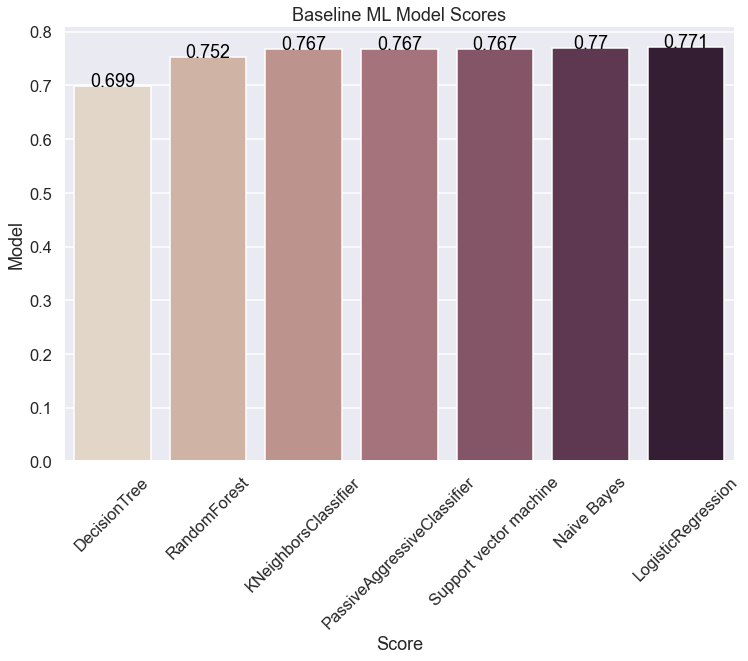

In [161]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('talk')
g =sns.barplot(x='Model',y='Score',data=Scoreboard, palette="ch:.25")
for index, row in Scoreboard.iterrows():
    g.text(row.name, row.Score, round(row.Score,3), color='black', ha="center")
    
plt.xticks(rotation=45)
plt.title('Baseline ML Model Scores')
plt.ylabel('Model')
plt.xlabel('Score')
sns.despine()

plt.show()

Conclusion : 
1. Data is not that complicate and accuracy of the data lies on 77%(godd accuracy)
2. No need of collecting data from outside 
3. I did'nt use Dimensinity Reduction algorithms because it reduces columns not rows and rows in the data set are                  large and I have used all the columns of the dataset for traning and testing  the dataset